# COMP4115: Exploratory Data Analysis and Visualization
# Lab5. Implementation of Perceptron Algorithm

## 1. Basic Implmentation of Perceptron Algorithm

In [1]:
import numpy as np
def my_perceptron(X, y):
    # Initialize the weigths to zeros
    w = np.zeros(X.shape[1])
    it = 0
    # Iterate until all points are correctly classified
    while True:
        for xi, yi in zip(X,y):
            it = it + 1;
            print('*********' + "iteration" + str(it) + '*********')
            print("xi: " + np.array2string(xi) + ", yi: " + str(yi) + ", w: " + np.array2string(w))
            if int(np.sign(w.T.dot(xi))) != yi:
                w += yi*xi
                print("update w: " + np.array2string(w))
            if(classification_error(X, y, w) == 0):
                return w

def classification_error(X, y, w):
    # Error defined as fraction of misclassified points
    M = len(X)
    n_mispts = 0
    error = 0
    for xi, yi in zip(X,y):
        if int(np.sign(w.T.dot(xi))) != yi:
            n_mispts += 1
            error = n_mispts / float(M)
    return error

*********iteration1*********
xi: [ 1  1 -1], yi: 1, w: [ 0.  0.  0.]
update w: [ 1.  1. -1.]
*********iteration2*********
xi: [1 1 1], yi: 1, w: [ 1.  1. -1.]
*********iteration3*********
xi: [ 1 -1  1], yi: 1, w: [ 1.  1. -1.]
update w: [ 2.  0.  0.]
*********iteration4*********
xi: [ 1 -1 -1], yi: -1, w: [ 2.  0.  0.]
update w: [ 1.  1.  1.]
[ 1.  1.  1.]


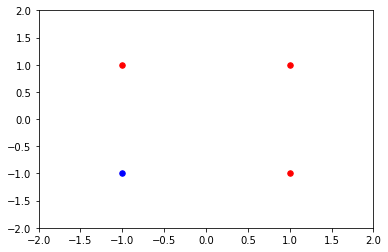

In [2]:
# perceptron on a seperable case 
X = np.array([[1, 1, -1], [1, 1, 1], [1, -1, 1], [1, -1, -1]])
y = np.array([1,1,1,-1])

# visualize the data
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[y==1, 1], X[y==1, 2], s=30, color = 'r')
plt.scatter(X[y==-1, 1], X[y==-1, 2], s=30, color = 'b')
plt.xlim(-2,2);
plt.ylim(-2, 2);

# apply perceptron on it
w = my_perceptron(X,y)
print(w)

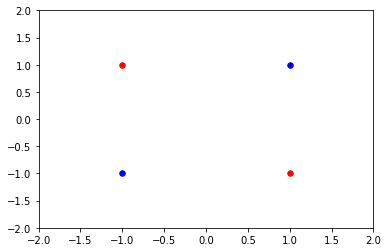

In [3]:
# perceptron on a non-separable case
X = np.array([[1, 1, -1], [1, 1, 1], [1, -1, 1], [1, -1, -1]])
y = np.array([1,-1,1,-1])

# visualize the data
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[y==1, 1], X[y==1, 2], s=30, color = 'r')
plt.scatter(X[y==-1, 1], X[y==-1, 2], s=30, color = 'b')
plt.xlim(-2,2);
plt.ylim(-2, 2);

# apply perceptron on it
#w = my_perceptron(X,y)    # it will result in an infinite loop


## 2. A more practical Perceptron Algorithm

In [4]:
import numpy as np
def my_perceptron_train(X, y, maxIter = 20):
    # Initialize the weigths to zeros
    X_train = np.c_[X.copy(), np.ones(X.shape[0])] # add a constant cloumns with all elements equal to one
    w = np.zeros(X_train.shape[1])
    it = 0
    w_best = w.copy()
    min_error_rate = 1
    # Iterate until all points are correctly classified
    while(it < maxIter):
        it = it + 1
        for xi, yi in zip(X_train,y):
            if int(np.sign(w.T.dot(xi))) != yi:
                w += yi*xi
            error_rate = classification_error(X_train, y, w)
            if(error_rate == 0):
                return w
            if(error_rate < min_error_rate):    # maintain the best solution
                w_best = w.copy()
                min_error_rate = error_rate
    
    return w_best
                
def my_perceptron_prediction(X, w):
    X_test = np.c_[X, np.ones(X.shape[0])] 
    y_pred = np.ones(X_test.shape[0])
    i = 0
    for xi in X_test:
        if np.sign(w.T.dot(xi)) < 0:
            y_pred[i] = -1
        i = i+1
    return y_pred 

## 3. Test our perceptron algorithm on iris dataset

In [5]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = df.drop(['species'], axis=1).values
y = np.ones(df.shape[0])
y[df['species']!='versicolor'] = -1

# Split X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

w = my_perceptron_train(X_train,y_train, maxIter = 100)

y_pred = my_perceptron_prediction(X_test, w)

print("test accuracy: " + str(sum(y_test == y_pred)/len(y_pred)))

test accuracy: 0.8
